# Árboles de Decisión y Regresión

La idea de este _notebook_ es entender cómo entrenar y usar un árbol de de decisión en Scikit Learn, pero además vamos a aprender a visualizar estos árboles. Además, para los árboles de regresión, vamos a entender los efectos de limitar la profundidad y establecer un mínimo de elementos para hacer _split_.

## Árboles de Decisión

Vamos a entrenar un árbol de decisión con el _dataset_ Iris. Vamos a pedir que nos retorne el tipo de flor.

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # Largo y ancho del pétalo
y = iris.target

# random_state=42 nos permite tener siempre los mismos resultados
# si quieres el comportamiento habitual, descomenta la línea más abajo
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
# tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Ahora vamos a usar la función de Scikit Learn para visualizar el árbol de decisión.

In [43]:
from sklearn.tree import export_graphviz

# Ojo, esto genera un .dot, tienes que transformarlo a un .png
export_graphviz(
    tree_clf,
    out_file='/Users/adriansotosuarez/Desktop/tree.dot', # Se exporta en esta ubicación
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Podemos ver que el árbol resultante tendrá la siguiente forma (Scikit Learn no siempre generará el mismo árbol si le quitas el `random_state`):

![Árbol de Decisión](img/tree.png)

Que es equivalente al árbol visto durante clases. En cada nodo tenemos el valor de la impureza Gini, de las instancias que caen en ese nodo, el _ratio_ de las clases. Cabe destacar que al instanciar el clasificador, solicitamos que la máxima profundidad del árbol fuera de 2. Ahora vamos a ver la frontera de decisión del árbol.

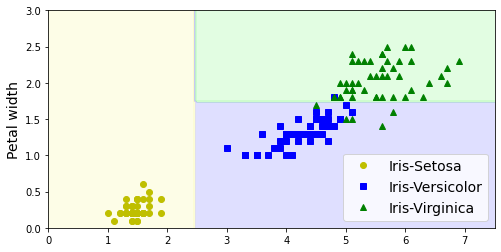

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary_iris(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris-Setosa')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
    plt.axis(axes)
    
    plt.ylabel('Petal width', fontsize=14)
    plt.legend(loc='lower right', fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary_iris(tree_clf, X, y)

plt.show()

Como vemos, la frontera de decisión queda acotada por regiones según los nodos del árbol. Es una buena idea inspeccionar cómo cambia esto cuando le entregamos otra profundidad al árbol. Ahora probemos qué pasa cuando intentamos con más _features_.

In [45]:
iris = load_iris()
X = iris.data
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)

export_graphviz(
    tree_clf,
    out_file='/Users/adriansotosuarez/Desktop/tree2.dot', # Se exporta en esta ubicación
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Como vemos en la siguiente imagen:

![Árbol de Decisión](img/tree2.png)

Tenemos hojas que capturan pocas observaciones. Esto es porque, un aumento de la profundidad puede producr que el modelo haga _overfit_, sobre todo en un _dataset_ no muy grande como este. Ahora vamos a hacer dos tareas: (1) vamos a predecir una nueva flor y (2) vamos a pedir que nos prediga la probabilidad de una instancia nueva sobre las posibles clases. Vamos a trabajar con el modelo que solamente usa el largo y el ancho del pétalo. Vamos a ver que predecir es lo mismo de siempre.

In [46]:
iris = load_iris()
X = iris.data[:, 2:] # Largo y ancho del pétalo
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

tree_clf.predict([[3, 1]])

array([1])

Ahora vamos a predecir la probabilidad de que esta instancia pertenezca a cada clase.

In [47]:
tree_clf.predict_proba([[3, 1]])

array([[0.        , 0.90740741, 0.09259259]])

La idea de predecir la probabilidad es recorrer el árbol hasta la hoja respectiva y pasar a probabilidad el _ratio_ de las distintas instancias en ella. Esto lo puedes checkear con el árbol que generaste a partir de los datos. Ahora vamos a ver cómo entrenar un árbol de regresión.

## Árboles de Regresión

Como es de esperar, para un árbol de regresión también podemos usar la interfaz `fit` y `predict`. Lo importante aquí es ver la función que la regresión genera.

Text(0.5, 1.0, 'max_depth=2')

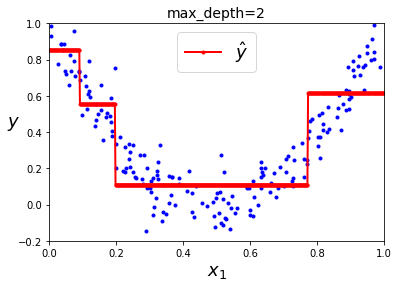

In [58]:
from sklearn.tree import DecisionTreeRegressor

# Generamos el dataset que distribuye cuadrático
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Entrenamos el regresor
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X, y)

# Esta función nos ayuda a graficar la función generada
def plot_regression_predictions(tree_reg, X, y):
    x1 = np.linspace(0, 1, 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis([0, 1, -0.2, 1])
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$y$', fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label=r'$\hat{y}$')

plt.figure(figsize=(6, 4))
plot_regression_predictions(tree_reg1, X, y)

plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=2', fontsize=14)

Ahora vamos a ver esto mismo pero con un árbol de mayor profundidad.

Text(0.5, 1.0, 'max_depth=3')

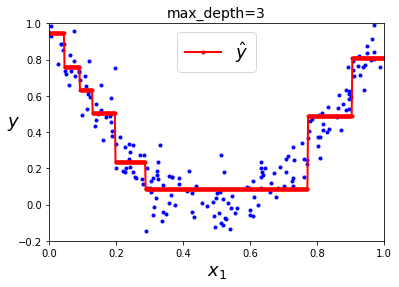

In [59]:
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2.fit(X, y)

plt.figure(figsize=(6, 4))
plot_regression_predictions(tree_reg2, X, y)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=3', fontsize=14)

Como vemos, al permitir más profundidad en el árbol, vamos ajustar mejor para los datos de entrenamiento. Esto queda más claro cuando ponemos atención a los árboles generados.

### Árbol para profundidad 2

In [55]:
# Ojo, esto genera un .dot, tienes que transformarlo a un .png
export_graphviz(
    tree_reg1,
    out_file='/Users/adriansotosuarez/Desktop/tree_r1.dot', # Se exporta en esta ubicación
    feature_names=['x1'],
    class_names=['y'],
    rounded=True,
    filled=True
)

![Árbol de Regresión](img/tree_r1.png)

### Árbol para profundidad 3

In [56]:
# Ojo, esto genera un .dot, tienes que transformarlo a un .png
export_graphviz(
    tree_reg2,
    out_file='/Users/adriansotosuarez/Desktop/tree_r2.dot', # Se exporta en esta ubicación
    feature_names=['x1'],
    class_names=['y'],
    rounded=True,
    filled=True
)

![Árbol de Regresión](img/tree_r2.png)

Ahora lo último que nos queda por revisar es el comportamiento de un árbol de decisión cuando le damos un mínimo de elementos a sus hojas para hacer split.

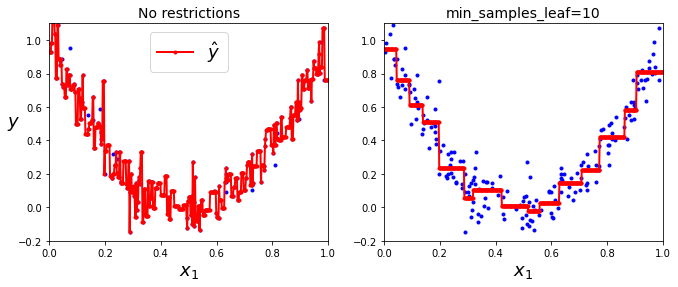

In [60]:
tree_reg1 = DecisionTreeRegressor(random_state=42) # no limitamos nada
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) # limitamos el número mínimo de elementos para hacer split
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

En este caso, cuando no limitamos ni la profundidad ni el número mínimo de elementos, nada impedirá que el árbol se sobre ajuste sobre cada uno de los elementos. Por lo mismo, hay que poner cuidado al momento de entrenar un árbol de regresión, ya que puede comportarse muy bien sobre los datos de entrenamiento, pero puede generalizar mal. Al dar un número mínimo de elementos para hacer split, lo que estamos haciendo es impedir una bifurcación si en la hoja hay menos del número de instancias señalado (en este caso 10).